In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
Tweets = pd.read_csv("../TweetSentiment.csv")
A1G = pd.read_csv("../CSVs/A1Grevised.csv")
GM = pd.read_csv("../CSVs/GMrevised.csv")
CSX = pd.read_csv("../CSVs/CSXrevised.csv")
BA = pd.read_csv("../CSVs/BArevised.csv")

In [3]:
Tweets.head()

,tweetdate,compound,neg,neu,pos
0,2018-01-01,0.271533,0.116333,0.681667,0.201667
1,2018-01-02,0.567400,0.080154,0.709692,0.210231
2,2018-01-03,0.113950,0.094750,0.782750,0.122500
3,2018-01-04,-0.029990,0.113300,0.779300,0.107300
4,2018-01-05,-0.083683,0.072833,0.851667,0.075833


In [4]:
A1G.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,1/2/2019,27.809999,28.650000,27.549999,28.650000,28.251038,4.0,Positive,NaN,NaN,-2.400000
1,1/3/2019,27.570000,27.570000,25.969999,26.250000,25.884460,5.0,Negative,-2.400000,-8.376963,0.809999
2,1/4/2019,26.200001,27.059999,26.200001,27.059999,26.683180,0.0,Positive,0.809999,3.085710,0.880002
3,1/7/2019,27.959999,27.959999,27.900000,27.940001,27.550928,178.0,Negative,0.880002,3.252040,0.939998
4,1/8/2019,28.620001,29.010000,28.620001,28.879999,28.477835,100.0,Positive,0.939998,3.364345,-0.479999


In [5]:
GM.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,2019-01-02,32.849998,33.810001,32.410000,33.639999,32.282429,7662300,Positive,NaN,NaN,-1.389999
1,2019-01-03,33.340000,33.680000,32.200001,32.250000,30.948524,11618300,Negative,-1.389999,-4.131983,1.080002
2,2019-01-04,32.799999,33.570000,32.430000,33.330002,31.984938,10784000,Positive,1.080002,3.348843,1.029999
3,2019-01-07,33.709999,34.970001,33.480000,34.360001,32.973373,10722300,Positive,1.029999,3.090306,0.450000
4,2019-01-08,35.000000,35.680000,34.490002,34.810001,33.405216,10532900,Negative,0.450000,1.309662,0.369999


In [6]:
BA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,1/3/2019,319.489990,319.739990,309.399994,310.899994,303.897919,5705600,Negative,-12.910004,-3.986907,16.179993
1,1/4/2019,316.690002,328.440002,316.079987,327.079987,319.713531,4448800,Positive,16.179993,5.204244,1.029998
2,1/7/2019,330.519989,330.690002,323.350006,328.109985,320.720306,4030300,Positive,1.029998,0.314907,12.420014
3,1/8/2019,334.109985,341.250000,332.649994,340.529999,332.860657,4736500,Positive,12.420014,3.785320,3.299988
4,1/9/2019,342.959991,347.200012,340.869995,343.829987,336.086273,4213900,Positive,3.299988,0.969074,8.779998


In [7]:
CSX.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,2019-01-02,60.759998,62.250000,60.020000,61.950001,61.114838,5012900,Positive,NaN,NaN,-0.970001
1,2019-01-03,61.360001,61.810001,60.360001,60.980000,60.157917,7842400,Negative,-0.970001,-1.565780,1.810001
2,2019-01-04,61.000000,62.830002,60.529999,62.790001,61.943512,6181200,Positive,1.810001,2.968188,-0.340000
3,2019-01-07,62.430000,63.070000,61.349998,62.450001,61.608097,6262300,Positive,-0.340000,-0.541487,0.899997
4,2019-01-08,63.779999,64.180000,62.639999,63.349998,62.495960,5079300,Negative,0.899997,1.441148,0.630002


Revising Date format

In [12]:
Tweets['tweetdate'] = pd.to_datetime(Tweets['tweetdate']).dt.strftime('%m/%d/%Y')

In [13]:
Tweets.rename(columns = {'tweetdate':'Date'}, inplace = True)
Tweets.head()

,Date,compound,neg,neu,pos
0,01/01/2018,0.271533,0.116333,0.681667,0.201667
1,01/02/2018,0.567400,0.080154,0.709692,0.210231
2,01/03/2018,0.113950,0.094750,0.782750,0.122500
3,01/04/2018,-0.029990,0.113300,0.779300,0.107300
4,01/05/2018,-0.083683,0.072833,0.851667,0.075833


In [10]:
GM['Date'] = pd.to_datetime(GM['Date']).dt.strftime('%m/%d/%Y')

In [11]:
GM.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,01/02/2019,32.849998,33.810001,32.410000,33.639999,32.282429,7662300,Positive,NaN,NaN,-1.389999
1,01/03/2019,33.340000,33.680000,32.200001,32.250000,30.948524,11618300,Negative,-1.389999,-4.131983,1.080002
2,01/04/2019,32.799999,33.570000,32.430000,33.330002,31.984938,10784000,Positive,1.080002,3.348843,1.029999
3,01/07/2019,33.709999,34.970001,33.480000,34.360001,32.973373,10722300,Positive,1.029999,3.090306,0.450000
4,01/08/2019,35.000000,35.680000,34.490002,34.810001,33.405216,10532900,Negative,0.450000,1.309662,0.369999


In [14]:
CSX['Date'] = pd.to_datetime(CSX['Date']).dt.strftime('%m/%d/%Y')

In [15]:
CSX.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,01/02/2019,60.759998,62.250000,60.020000,61.950001,61.114838,5012900,Positive,NaN,NaN,-0.970001
1,01/03/2019,61.360001,61.810001,60.360001,60.980000,60.157917,7842400,Negative,-0.970001,-1.565780,1.810001
2,01/04/2019,61.000000,62.830002,60.529999,62.790001,61.943512,6181200,Positive,1.810001,2.968188,-0.340000
3,01/07/2019,62.430000,63.070000,61.349998,62.450001,61.608097,6262300,Positive,-0.340000,-0.541487,0.899997
4,01/08/2019,63.779999,64.180000,62.639999,63.349998,62.495960,5079300,Negative,0.899997,1.441148,0.630002


### Joining Tweets and Stocks

In [16]:
A1G = A1G.merge(Tweets,how = 'inner', on = 'Date')
A1G.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos
0,10/10/2019,24.469999,24.469999,24.190001,24.190001,24.101749,0.0,Negative,-0.254999,-1.043154,0.875000,-0.126158,0.106833,0.799542,0.093708
1,10/11/2019,24.655001,25.120001,24.655001,25.065001,24.973557,0.0,Positive,0.875000,3.617197,-0.315001,0.200773,0.080096,0.742519,0.177327
2,10/14/2019,24.680000,24.980000,24.680000,24.750000,24.659704,20.0,Positive,-0.315001,-1.256736,0.559999,0.048056,0.066882,0.822324,0.110794
3,10/15/2019,25.000000,25.309999,24.950001,25.309999,25.217661,100.0,Positive,0.559999,2.262622,0.340001,0.001340,0.100667,0.741000,0.158400
4,10/16/2019,25.520000,25.815001,25.520000,25.650000,25.556421,193.0,Positive,0.340001,1.343347,-0.315001,0.097252,0.115600,0.696520,0.187960


In [17]:
BA = BA.merge(Tweets,how = 'inner', on = 'Date')
BA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos
0,10/10/2019,373.700012,374.540009,370.329987,371.000000,368.847473,2723700,Positive,-3.959991,-1.056110,3.920013,-0.126158,0.106833,0.799542,0.093708
1,10/11/2019,373.000000,376.940002,370.079987,374.920013,372.744751,3935400,Positive,3.920013,1.056607,-1.740020,0.200773,0.080096,0.742519,0.177327
2,10/14/2019,374.250000,378.700012,372.679993,373.179993,371.014801,2124500,Positive,-1.740020,-0.464104,-2.220002,0.048056,0.066882,0.822324,0.110794
3,10/15/2019,372.579987,373.529999,370.529999,370.959991,368.807678,2836600,Positive,-2.220002,-0.594888,1.470002,0.001340,0.100667,0.741000,0.158400
4,10/16/2019,370.220001,377.420013,369.239990,372.429993,370.269165,3657100,Positive,1.470002,0.396270,-3.369995,0.097252,0.115600,0.696520,0.187960


In [18]:
CSX = CSX.merge(Tweets,how = 'inner', on = 'Date')
CSX.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos
0,01/02/2019,60.759998,62.250000,60.020000,61.950001,61.114838,5012900,Positive,NaN,NaN,-0.970001,0.332267,0.053667,0.755333,0.191000
1,01/03/2019,61.360001,61.810001,60.360001,60.980000,60.157917,7842400,Negative,-0.970001,-1.565780,1.810001,0.307300,0.051000,0.788333,0.160778
2,01/04/2019,61.000000,62.830002,60.529999,62.790001,61.943512,6181200,Positive,1.810001,2.968188,-0.340000,0.431943,0.033571,0.783000,0.183429
3,01/07/2019,62.430000,63.070000,61.349998,62.450001,61.608097,6262300,Positive,-0.340000,-0.541487,0.899997,-0.290933,0.150833,0.731667,0.117500
4,01/08/2019,63.779999,64.180000,62.639999,63.349998,62.495960,5079300,Negative,0.899997,1.441148,0.630002,0.764440,0.054200,0.646600,0.299000


In [19]:
GM = GM.merge(Tweets,how = 'inner', on = 'Date')
GM.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos
0,01/02/2019,32.849998,33.810001,32.410000,33.639999,32.282429,7662300,Positive,NaN,NaN,-1.389999,0.332267,0.053667,0.755333,0.191000
1,01/03/2019,33.340000,33.680000,32.200001,32.250000,30.948524,11618300,Negative,-1.389999,-4.131983,1.080002,0.307300,0.051000,0.788333,0.160778
2,01/04/2019,32.799999,33.570000,32.430000,33.330002,31.984938,10784000,Positive,1.080002,3.348843,1.029999,0.431943,0.033571,0.783000,0.183429
3,01/07/2019,33.709999,34.970001,33.480000,34.360001,32.973373,10722300,Positive,1.029999,3.090306,0.450000,-0.290933,0.150833,0.731667,0.117500
4,01/08/2019,35.000000,35.680000,34.490002,34.810001,33.405216,10532900,Negative,0.450000,1.309662,0.369999,0.764440,0.054200,0.646600,0.299000


In [20]:
GM.shape

(273, 15)

In [21]:
CSX.shape

(273, 15)

In [22]:
BA.shape

(44, 15)

In [23]:
A1G.shape

(43, 15)

### SVM models per stock

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

A1G Testing

In [26]:
A1G_X = A1G["compound"].values.reshape(-1, 1)
A1G_y = A1G["Close"].values.reshape(-1, 1)
print(A1G_X.shape,A1G_y.shape)

(43, 1) (43, 1)


Text(0, 0.5, 'Close Price')

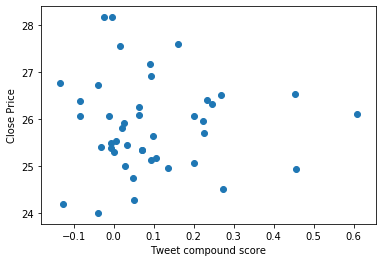

In [27]:
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet compound score")
plt.ylabel("Close Price")

Text(0, 0.5, 'Adj Close Price')

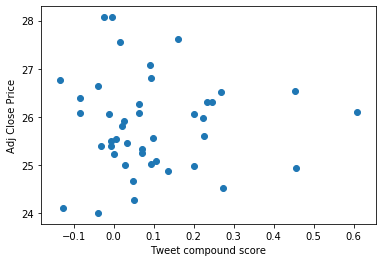

In [29]:
A1G_X = A1G["compound"].values.reshape(-1, 1)
A1G_y = A1G["Adj Close"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet compound score")
plt.ylabel("Adj Close Price")

Text(0, 0.5, 'Volume')

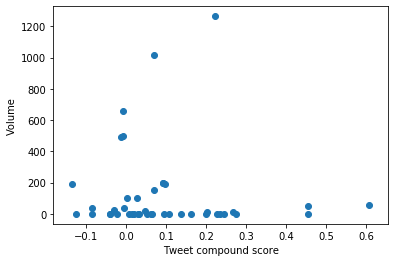

In [30]:
A1G_X = A1G["compound"].values.reshape(-1, 1)
A1G_y = A1G["Volume"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet compound score")
plt.ylabel("Volume")

Text(0, 0.5, 'Daily_Change')

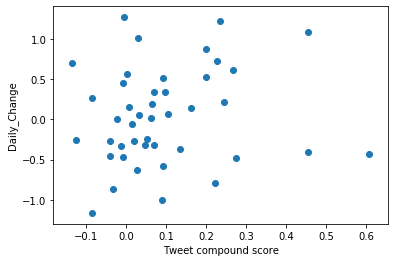

In [32]:
A1G_X = A1G["compound"].values.reshape(-1, 1)
A1G_y = A1G["Daily_Change"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet compound score")
plt.ylabel("Daily Change")

Text(0, 0.5, 'Daily Percent Change')

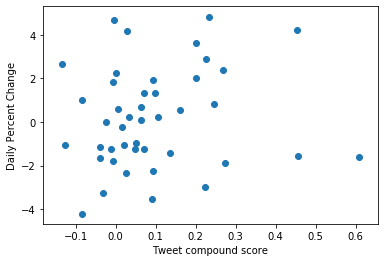

In [33]:
A1G_X = A1G["compound"].values.reshape(-1, 1)
A1G_y = A1G["Daily_%_Change"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet compound score")
plt.ylabel("Daily Percent Change")

Text(0, 0.5, 'Future Change')

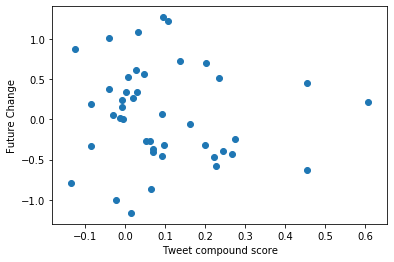

In [34]:
A1G_X = A1G["compound"].values.reshape(-1, 1)
A1G_y = A1G["Future_Change"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet compound score")
plt.ylabel("Future Change")

Text(0, 0.5, 'Close Price')

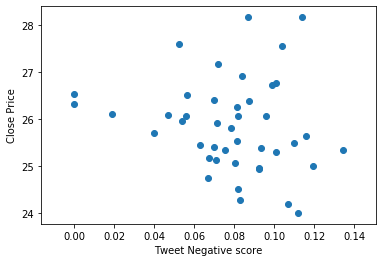

In [35]:
A1G_X = A1G["neg"].values.reshape(-1, 1)
A1G_y = A1G["Close"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet Negative score")
plt.ylabel("Close Price")

Text(0, 0.5, 'Adj Close Price')

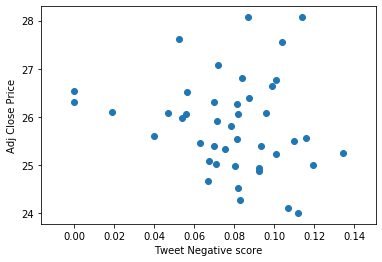

In [36]:
A1G_X = A1G["neg"].values.reshape(-1, 1)
A1G_y = A1G["Adj Close"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet Negative score")
plt.ylabel("Adj Close Price")

Text(0, 0.5, 'Volume')

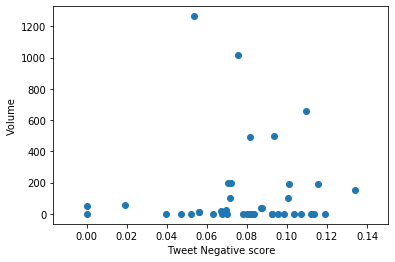

In [37]:
A1G_X = A1G["neg"].values.reshape(-1, 1)
A1G_y = A1G["Volume"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet Negative score")
plt.ylabel("Volume")

Text(0, 0.5, 'Positive or Negative change')

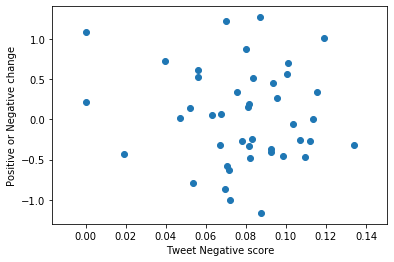

In [39]:
A1G_X = A1G["neg"].values.reshape(-1, 1)
A1G_y = A1G["Daily_Change"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet Negative score")
plt.ylabel("Daily Change")

Text(0, 0.5, 'Daily Percent Price')

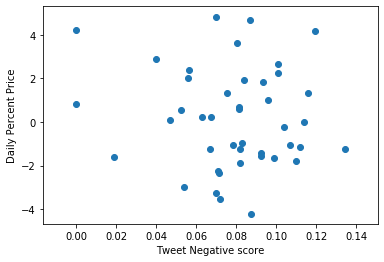

In [41]:
A1G_X = A1G["neg"].values.reshape(-1, 1)
A1G_y = A1G["Daily_%_Change"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet Negative score")
plt.ylabel("Daily Percent Price")

Text(0, 0.5, 'Future Change')

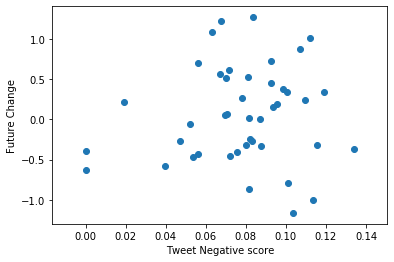

In [42]:
A1G_X = A1G["neg"].values.reshape(-1, 1)
A1G_y = A1G["Future_Change"].values.reshape(-1, 1)
plt.scatter(A1G_X,A1G_y)
plt.xlabel("Tweet Negative score")
plt.ylabel("Future Change")